In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("Placement_Data.csv")
df['salary']=df['salary'].fillna(0)
df.drop('sl_no', inplace=True, axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


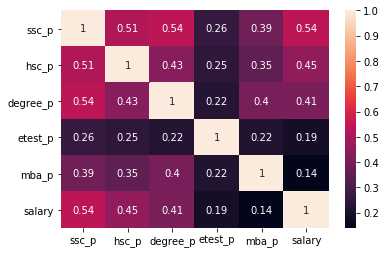

In [3]:
sns.heatmap(df.corr(), annot=True)

### Which Gender is Placed the Most?

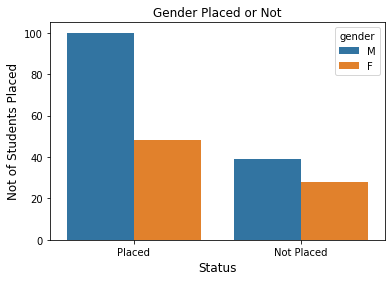

In [4]:
sns.countplot(x='status', hue='gender', data=df)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Not of Students Placed", fontsize=12)
plt.title("Gender Placed or Not", fontsize=12)
plt.show()

Male is Placed the most!

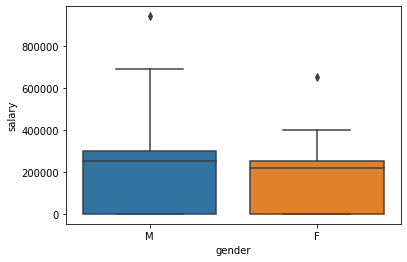

In [5]:
sns.boxplot(df['gender'], df['salary'])

A Male Student has a Highest package of 10LPA and a Female Student has a Highest Package of 6.2LPA

Male Students are getting an average salary of 3LPA and Female Students are are getting an average salary of 2.3LPA

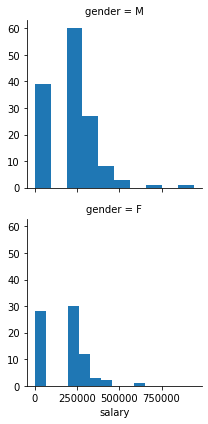

In [6]:
g = sns.FacetGrid(df, row = 'gender')
g = g.map(plt.hist, 'salary')

plt.show()

Almost 39 student from Male gender were not Placed and almost 28 Female Students were not Placed

### Which Board in High School is Best for getting placement?

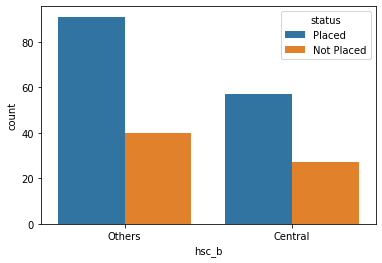

In [7]:
sns.countplot(df['hsc_b'], hue='status', data=df)

Text(0.5, 1.0, 'Placed Student according to High School Board')

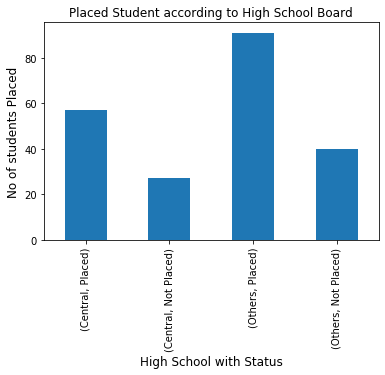

In [8]:
df.groupby('hsc_b')['status'].value_counts().plot(kind='bar')
plt.xlabel("High School with Status", fontsize=12)
plt.ylabel("No of students Placed", fontsize=12)
plt.title("Placed Student according to High School Board")

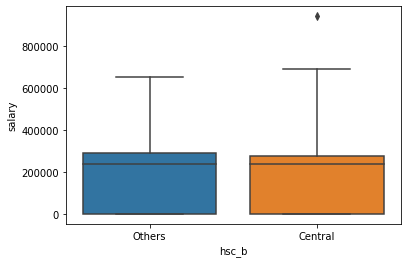

In [9]:
sns.boxplot(df['hsc_b'], df['salary'])

Students with State Boards are getting an average salary of 2.8LPA and Students with Central Board are are getting an average salary of 2.6LPA.

Also the Highest Package of almost 10LPA is from Central Board Student

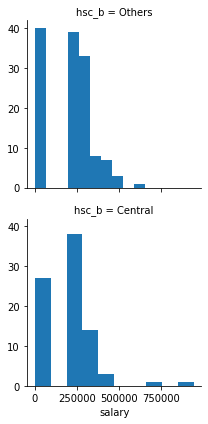

In [10]:
g = sns.FacetGrid(df, row = 'hsc_b')
g = g.map(plt.hist, 'salary')

plt.show()

Almost 40 student from State Board Students were not Placed and almost 27 Central Board Students were not Placed

### Which Board in 12th is Best for getting placement?

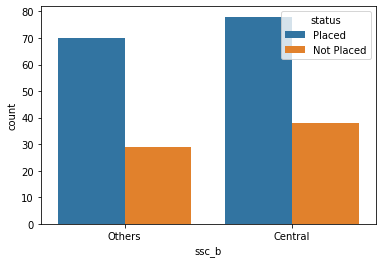

In [11]:
sns.countplot(df['ssc_b'], hue=df['status'])

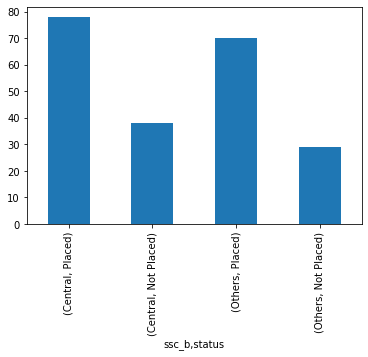

In [12]:
df.groupby("ssc_b")['status'].value_counts().plot(kind='bar')

Students from Central Board in 12th are getting most Placed!

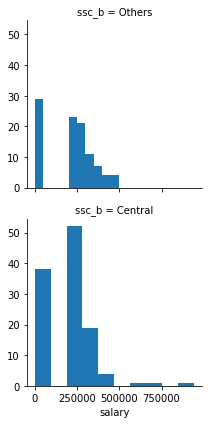

In [13]:
g = sns.FacetGrid(df, row = 'ssc_b')
g = g.map(plt.hist, 'salary')

plt.show()

Almost 38 student from Central Board Students were not Placed and almost 29 State Students were not Placed

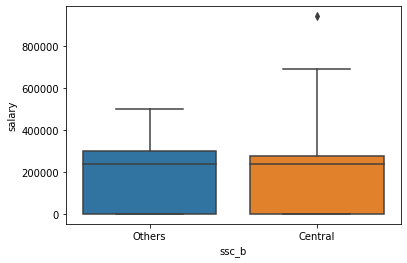

In [14]:
sns.boxplot(df['ssc_b'], df['salary'])

Students of State Boards in 12th are getting an average salary of 3LPA and Students of Central Boards in 12th are getting an average salary of 2.7PA.

Also the Highest Package of almost 10LPA is from Central Board Student

### Which HSC Subject is Best for getting Placed?

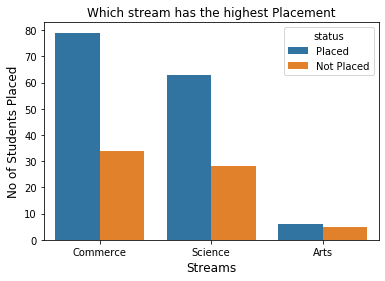

In [15]:
sns.countplot(df['hsc_s'], hue=df['status'])
plt.xlabel("Streams",fontsize=12)
plt.ylabel("No of Students Placed", fontsize=12)
plt.title("Which stream has the highest Placement")
plt.show()

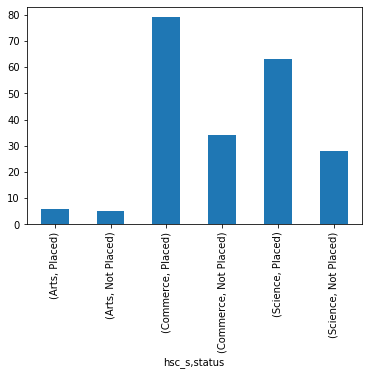

In [16]:
df.groupby("hsc_s")['status'].value_counts().plot(kind='bar')

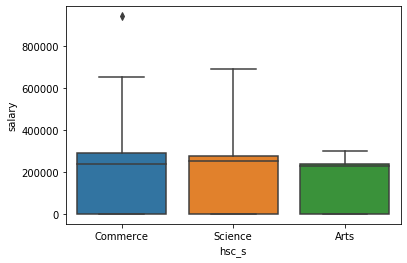

In [17]:
sns.boxplot(df['hsc_s'], df['salary'])

From all the above observations:

1. Commerce Students are most Likely to get Placed.
2. Science Students are also getting placed most after Science Students.
3. As there are less students in Arts Stream so half of them are placed and not placed.
4. Highest Package was alloted to a commerce Student.

So, The Students should be of Commerce Stream in 12th to get placed will likely..

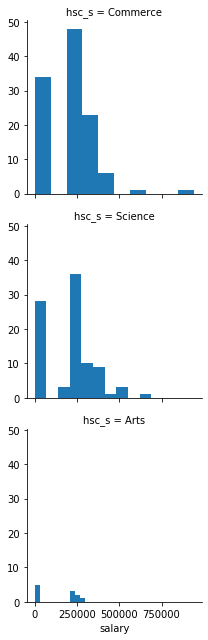

In [18]:
g=sns.FacetGrid(data=df, row='hsc_s').map(plt.hist, 'salary')
plt.show()

### Which Degree is Best for getting Placed?

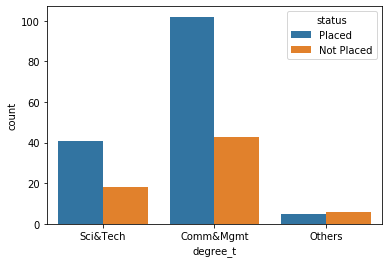

In [19]:
sns.countplot(df['degree_t'], hue=df['status'])

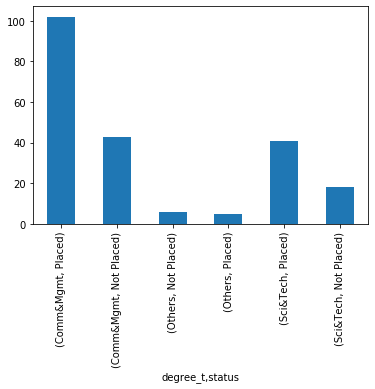

In [20]:
df.groupby("degree_t")['status'].value_counts().plot(kind='bar')

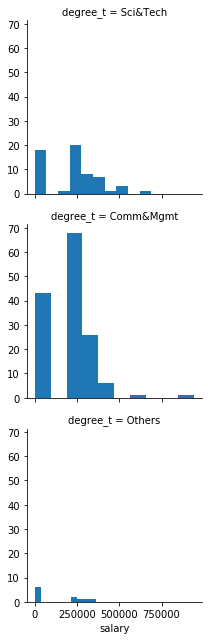

In [21]:
g=sns.FacetGrid(data=df, row='degree_t').map(plt.hist, 'salary')

1. Commerce & Management Students are most Placed.
2. Science Students are also placed but less then Commerce Students
3. Other stream students very less but half of them are placed and half of them are not.

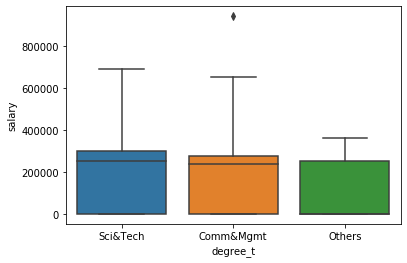

In [22]:
sns.boxplot(df['degree_t'], df['salary'])

From above Observations: 
1. The Science Students have a avg. package of 2.9 LPA, Commerce&Managment Students have a avg. package of 2.8 LPA, and Other stream students have a avg. package of 2.5LPA.
2. The Highest package was awarded to a Commercea & Management Student of 10LPA.

### Does Work Experience affects to get Placed?

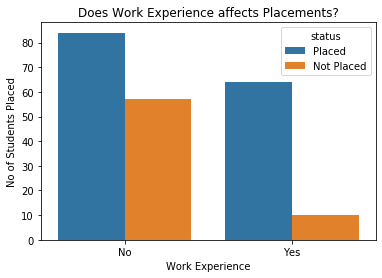

In [23]:
sns.countplot("workex", hue="status", data=df)
plt.xlabel("Work Experience")
plt.ylabel("No of Students Placed")
plt.title("Does Work Experience affects Placements?")
plt.show()

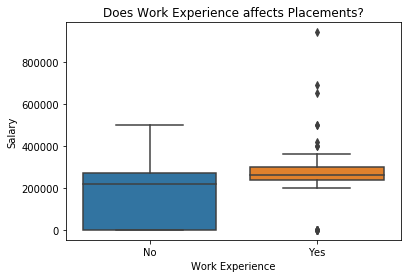

In [24]:
sns.boxplot('workex', 'salary', data=df)
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Does Work Experience affects Placements?")
plt.show()

The Work Experience does not affects the placement.
But the person have work experience have more salary package then one having no Experience.

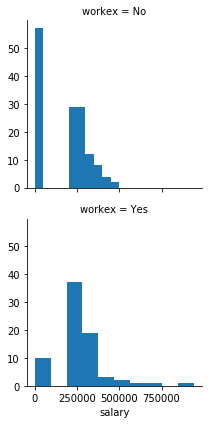

In [25]:
g=sns.FacetGrid(data=df, row='workex').map(plt.hist, 'salary')

### Does Specialisation Matters in getting Placed?

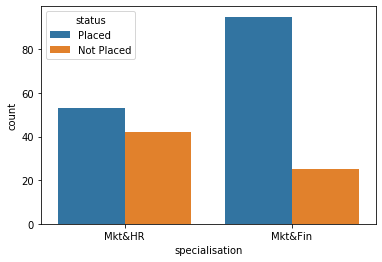

In [26]:
sns.countplot('specialisation', data=df, hue='status')

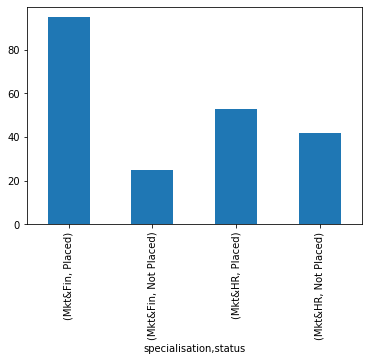

In [27]:
df.groupby("specialisation")['status'].value_counts().plot(kind='bar')

The Marketing and Finance Students are mostly placed.So, the Specialisation is important to get placed.
Whereas, the Marketing and HR specialisation students are proportionally placed and not placed.

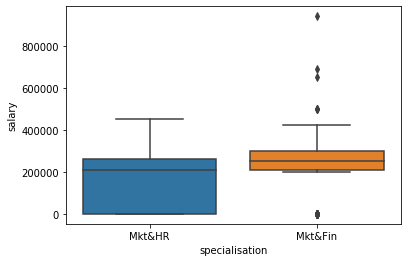

In [28]:
sns.boxplot(df['specialisation'], df['salary'])

The Marketing and HR Students have an avg package of 2.3 to 2.5 LPA salary but the Marketing and Finanace Students which are mostly placed have a good package of avg. package of 3 LPA with a hisghest package of 10LPA.

### Does Percentage Matter in Getting Placed?

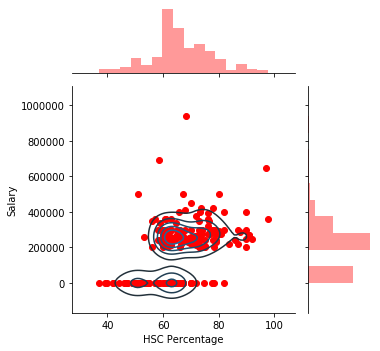

In [29]:
sns.jointplot(x='hsc_p', y='salary', data=df, kind='scatter', height=5, ratio=3, color='red').set_axis_labels("HSC Percentage", "Salary").plot_joint(sns.kdeplot, zorder=5, n_levels=6)
plt.show()

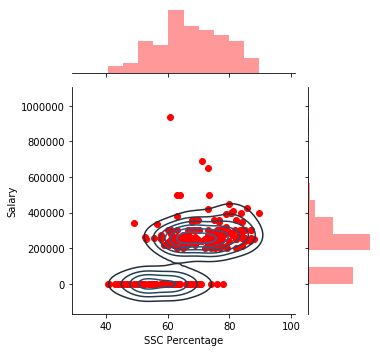

In [30]:
sns.jointplot(x='ssc_p', y='salary', data=df, kind='scatter', height=5, ratio=3, color='red').set_axis_labels("SSC Percentage", "Salary").plot_joint(sns.kdeplot, zorder=5, n_levels=6)
plt.show()

Yes, The HSC and SSC Percentage does matter in placements!

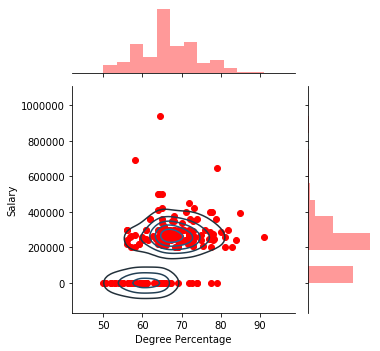

In [33]:
sns.jointplot(x='degree_p', y='salary', data=df, kind='scatter', height=5, ratio=3, color='red').set_axis_labels("Degree Percentage", "Salary").plot_joint(sns.kdeplot, zorder=1, n_levels=5)
plt.show()

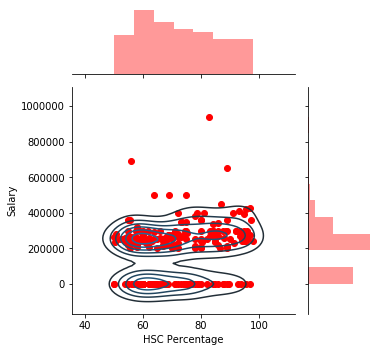

In [34]:
sns.jointplot(x='etest_p', y='salary', data=df, kind='scatter', height=5, ratio=3, color='red').set_axis_labels("HSC Percentage", "Salary").plot_joint(sns.kdeplot, zorder=5, n_levels=6)
plt.show()

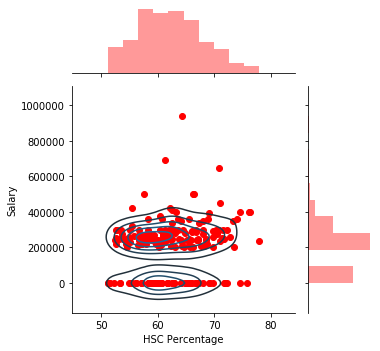

In [35]:
sns.jointplot(x='mba_p', y='salary', data=df, kind='scatter', height=5, ratio=3, color='red').set_axis_labels("HSC Percentage", "Salary").plot_joint(sns.kdeplot, zorder=5, n_levels=6)
plt.show()

The Degree %, etest % and MBA % also dosen't matter in getting placed?

Pearsons correlation: 0.511


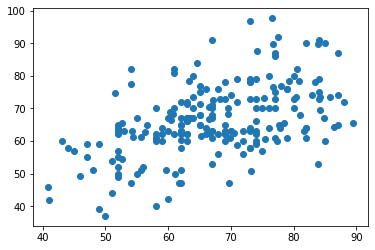

In [38]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['ssc_p'], df['hsc_p'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(df['ssc_p'], df['hsc_p'], marker='o')
plt.show()

Pearsons correlation: 0.408


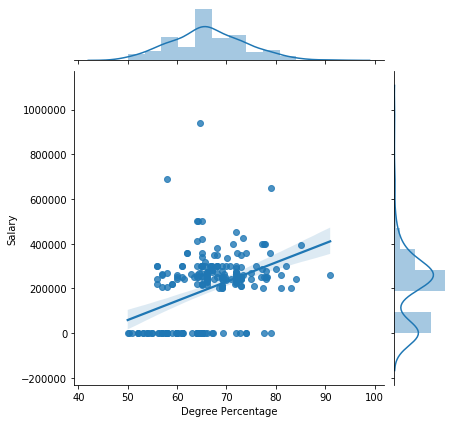

In [41]:
sns.jointplot(x="degree_p",y="salary", data=df, kind= "regplot").set_axis_labels("Degree Percentage", "Salary")
corr, _ = pearsonr(df['salary'], df['degree_p'])
print('Pearsons correlation: %.3f' % corr)
plt.show()

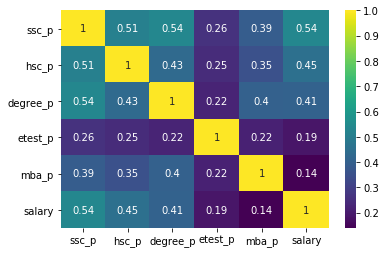

In [42]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [48]:
feature_corr_=[]
corr=df.corr()
for i in df.corr().columns:
    for j in df.corr().columns:
        
        if(i!=j and corr[i][j]>0.5):
            feature_corr_.append(i)
            feature_corr_.append(j)
            
set(feature_corr_)

{'degree_p', 'hsc_p', 'salary', 'ssc_p'}